# Goal :
Analyse our data so obtained from the criminal management system. 

Performing analysis in the back-end to gain insights

Guidethrough : 

1.Import liraries

2.Import dataset

3.Perform Data Analysis and EDA

4.Drawing Insights

# Importing the libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Importing our dataset

DATASET

Contains records of all the past criminals recorded so far in our software.

DATASET PROCESS : 

1.Data records taken as input in our software management platform

2.Data gathered stored in our database with sql workbench

3.Data exported into a csv format for further analysis

4.Csv format imported for analysis

In [43]:
data = pd.read_csv('m.csv')

In [44]:
data

,Case_id,Criminal_no,Criminal_name,Nick_name,arrest_date,dateofcrime,adress,age,occupation,Birthmark,crimeType,fatherName,gender,wnated
0,1,2,sam singh,sam,01/02/2023,2/01/2023,patia,26,business,spot on hand,assault,raj singh,male,no
1,10,12,muhamad qadri,muham,05/02/2023,05/03/2023,delhi,26,doctor,cut mark in right hand,assault,jaydev qadri,male,yes
2,11,13,iqbal qadri,iqbal,05/02/2023,05/03/2023,delhi,26,doctor,cut mark in right hand,assault,jaydev qadri,male,yes
3,12,14,rakesh mishra,raku,06/02/2023,05/03/2023,delhi,26,shopkeeper,mark in right hand,assault,rahul mishra,male,yes
4,13,15,navi mishra,navi,06/02/2023,05/03/2023,delhi,26,shopkeeper,mark in right hand,assault,ishan mishra,male,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,78,78,jahan ansari,jaan,06/09/2023,01/07/2023,bangalore,21,student,mole in cheek,laundering,ashraf ansari,female,no
75,79,79,sendal kafi,sheni,01/09/2023,01/07/2023,manipur,25,housewife,burn in left hand,laundering,ajraj kafi,female,no
76,8,10,vikram dey,loid,04/02/2023,04/03/2023,delhi,26,doctor,cut mark in hand,assault,jaydev dey,male,no
77,80,80,karishma kaif,karish,21/10/2023,11/10/2023,odisha,29,model,four fingers in left hand,scam,parinat kaif,female,no


# Data Analysis and Exploratory Data Analysis

In [45]:
data.shape

(79, 14)

In [46]:
data.size

1106

INSIGHTS : 

Total data records = 79

Total attributes/columns = 14

No empty columns/rows

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Case_id        79 non-null     int64 
 1   Criminal_no    79 non-null     int64 
 2   Criminal_name  79 non-null     object
 3   Nick_name      79 non-null     object
 4   arrest_date    79 non-null     object
 5   dateofcrime    79 non-null     object
 6   adress         79 non-null     object
 7   age            79 non-null     int64 
 8   occupation     79 non-null     object
 9   Birthmark      79 non-null     object
 10  crimeType      79 non-null     object
 11  fatherName     79 non-null     object
 12  gender         79 non-null     object
 13  wnated         79 non-null     object
dtypes: int64(3), object(11)
memory usage: 8.8+ KB


INSIGHTS : 

No null values in any of the columns observed  ( number of data records = 79 for all columns)

In [48]:
data.head()

,Case_id,Criminal_no,Criminal_name,Nick_name,arrest_date,dateofcrime,adress,age,occupation,Birthmark,crimeType,fatherName,gender,wnated
0,1,2,sam singh,sam,01/02/2023,2/01/2023,patia,26,business,spot on hand,assault,raj singh,male,no
1,10,12,muhamad qadri,muham,05/02/2023,05/03/2023,delhi,26,doctor,cut mark in right hand,assault,jaydev qadri,male,yes
2,11,13,iqbal qadri,iqbal,05/02/2023,05/03/2023,delhi,26,doctor,cut mark in right hand,assault,jaydev qadri,male,yes
3,12,14,rakesh mishra,raku,06/02/2023,05/03/2023,delhi,26,shopkeeper,mark in right hand,assault,rahul mishra,male,yes
4,13,15,navi mishra,navi,06/02/2023,05/03/2023,delhi,26,shopkeeper,mark in right hand,assault,ishan mishra,male,yes


In [49]:
data.tail()

,Case_id,Criminal_no,Criminal_name,Nick_name,arrest_date,dateofcrime,adress,age,occupation,Birthmark,crimeType,fatherName,gender,wnated
74,78,78,jahan ansari,jaan,06/09/2023,01/07/2023,bangalore,21,student,mole in cheek,laundering,ashraf ansari,female,no
75,79,79,sendal kafi,sheni,01/09/2023,01/07/2023,manipur,25,housewife,burn in left hand,laundering,ajraj kafi,female,no
76,8,10,vikram dey,loid,04/02/2023,04/03/2023,delhi,26,doctor,cut mark in hand,assault,jaydev dey,male,no
77,80,80,karishma kaif,karish,21/10/2023,11/10/2023,odisha,29,model,four fingers in left hand,scam,parinat kaif,female,no
78,9,11,vikram singh,tim,05/02/2023,05/03/2023,delhi,26,doctor,cut mark in hand,assault,rahul singh,male,yes


INSIGHTS :

Typing error of the column 'wnated'

Typing error of the column 'adress'

In [50]:
data.rename(columns = {'wnated':'wanted'}, inplace = True)

In [51]:
data.rename(columns = {'adress':'address'}, inplace = True)

Typing error of column names resolved 

In [52]:
data

,Case_id,Criminal_no,Criminal_name,Nick_name,arrest_date,dateofcrime,address,age,occupation,Birthmark,crimeType,fatherName,gender,wanted
0,1,2,sam singh,sam,01/02/2023,2/01/2023,patia,26,business,spot on hand,assault,raj singh,male,no
1,10,12,muhamad qadri,muham,05/02/2023,05/03/2023,delhi,26,doctor,cut mark in right hand,assault,jaydev qadri,male,yes
2,11,13,iqbal qadri,iqbal,05/02/2023,05/03/2023,delhi,26,doctor,cut mark in right hand,assault,jaydev qadri,male,yes
3,12,14,rakesh mishra,raku,06/02/2023,05/03/2023,delhi,26,shopkeeper,mark in right hand,assault,rahul mishra,male,yes
4,13,15,navi mishra,navi,06/02/2023,05/03/2023,delhi,26,shopkeeper,mark in right hand,assault,ishan mishra,male,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,78,78,jahan ansari,jaan,06/09/2023,01/07/2023,bangalore,21,student,mole in cheek,laundering,ashraf ansari,female,no
75,79,79,sendal kafi,sheni,01/09/2023,01/07/2023,manipur,25,housewife,burn in left hand,laundering,ajraj kafi,female,no
76,8,10,vikram dey,loid,04/02/2023,04/03/2023,delhi,26,doctor,cut mark in hand,assault,jaydev dey,male,no
77,80,80,karishma kaif,karish,21/10/2023,11/10/2023,odisha,29,model,four fingers in left hand,scam,parinat kaif,female,no


In [53]:
data.isnull()

,Case_id,Criminal_no,Criminal_name,Nick_name,arrest_date,dateofcrime,address,age,occupation,Birthmark,crimeType,fatherName,gender,wanted
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,False,False,False,False,False,False,False,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76,False,False,False,False,False,False,False,False,False,False,False,False,False,False
77,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
data.isnull().sum()

Case_id          0
Criminal_no      0
Criminal_name    0
Nick_name        0
arrest_date      0
dateofcrime      0
address          0
age              0
occupation       0
Birthmark        0
crimeType        0
fatherName       0
gender           0
wanted           0
dtype: int64

INSIGHTS:

No Null Values detected in any of the columns, the dataset is complete and free from any missing values.

No duplicate values detected in the dataset

In [55]:
data.dtypes

Case_id           int64
Criminal_no       int64
Criminal_name    object
Nick_name        object
arrest_date      object
dateofcrime      object
address          object
age               int64
occupation       object
Birthmark        object
crimeType        object
fatherName       object
gender           object
wanted           object
dtype: object

In [56]:
data.describe()

,Case_id,Criminal_no,age
count,79.000000,79.000000,79.000000
mean,40.974684,41.000000,27.696203
std,22.992738,22.949219,3.360229
min,1.000000,2.000000,20.000000
25%,21.500000,21.500000,26.000000
50%,41.000000,41.000000,27.000000
75%,60.500000,60.500000,29.000000
max,80.000000,80.000000,36.000000


INSIGHTS:

Mean(AGE) = 27.6

Approximation leads to 27-28 age which is the most common age for committing a crime

Min age recorded for committing a crime : 20

Max age recorded for committing a crime : 36

# Data visualisation

<Axes: >

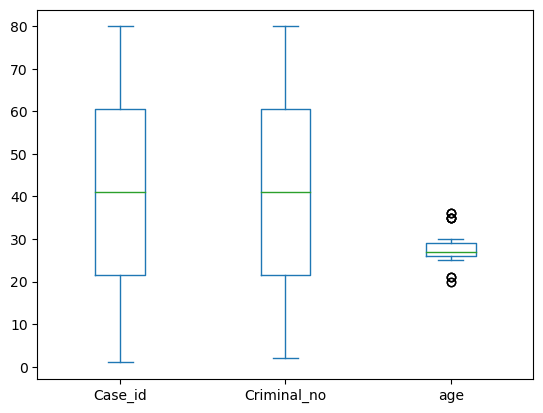

In [57]:
data.plot.box()

Crimes committed are mostly within the age group 24-30

There are some crimes committed by the age group <22 and age group >35(These values act as outliers)

<Axes: xlabel='gender'>

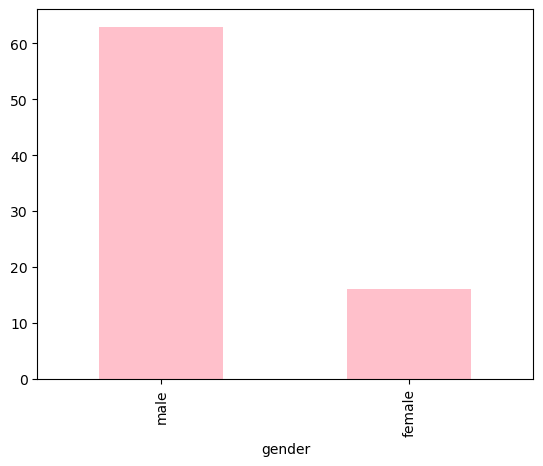

In [58]:
data['gender'].value_counts().plot.bar(color = 'pink')

Percentage of crimes committed by man is dominating woman 


<Axes: xlabel='address'>

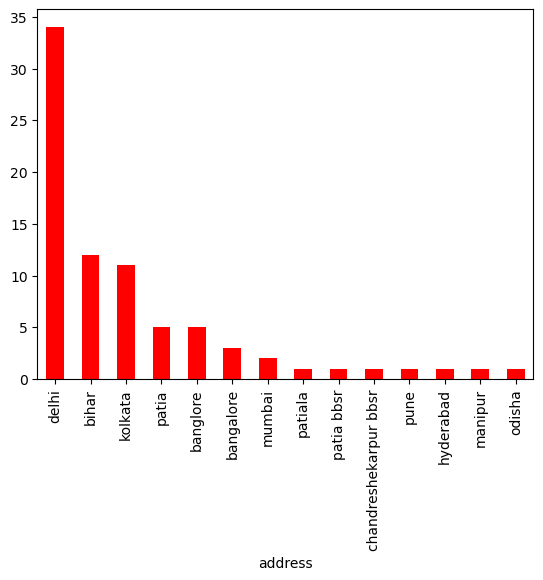

In [59]:
data['address'].value_counts().plot.bar(color = 'red')

INSIGHTS :

DELHI has been observed to have the maximum crime rates followed by Bihar and kolkata

In [72]:
df = data.copy()

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
df['crimeType'] = LabelEncoder().fit_transform(df['crimeType'])
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['wanted'] = LabelEncoder().fit_transform(df['wanted'])
df['occupation'] = LabelEncoder().fit_transform(df['occupation'])
df['address'] = LabelEncoder().fit_transform(df['address'])

In [65]:
df.head()

,Criminal_no,Criminal_name,Nick_name,arrest_date,dateofcrime,address,age,occupation,Birthmark,crimeType,fatherName,gender,wanted
0,2,sam singh,sam,01/02/2023,2/01/2023,10,26,1,spot on hand,1,raj singh,1,0
1,12,muhamad qadri,muham,05/02/2023,05/03/2023,4,26,3,cut mark in right hand,1,jaydev qadri,1,1
2,13,iqbal qadri,iqbal,05/02/2023,05/03/2023,4,26,3,cut mark in right hand,1,jaydev qadri,1,1
3,14,rakesh mishra,raku,06/02/2023,05/03/2023,4,26,10,mark in right hand,1,rahul mishra,1,1
4,15,navi mishra,navi,06/02/2023,05/03/2023,4,26,10,mark in right hand,1,ishan mishra,1,1


<Axes: >

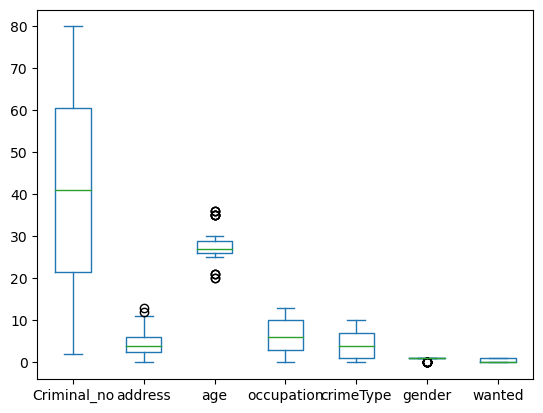

In [66]:
df.plot.box()


In [67]:
df.address.unique()

array([10,  4, 12, 11,  3,  1,  2,  6,  8, 13,  5,  0,  7,  9])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


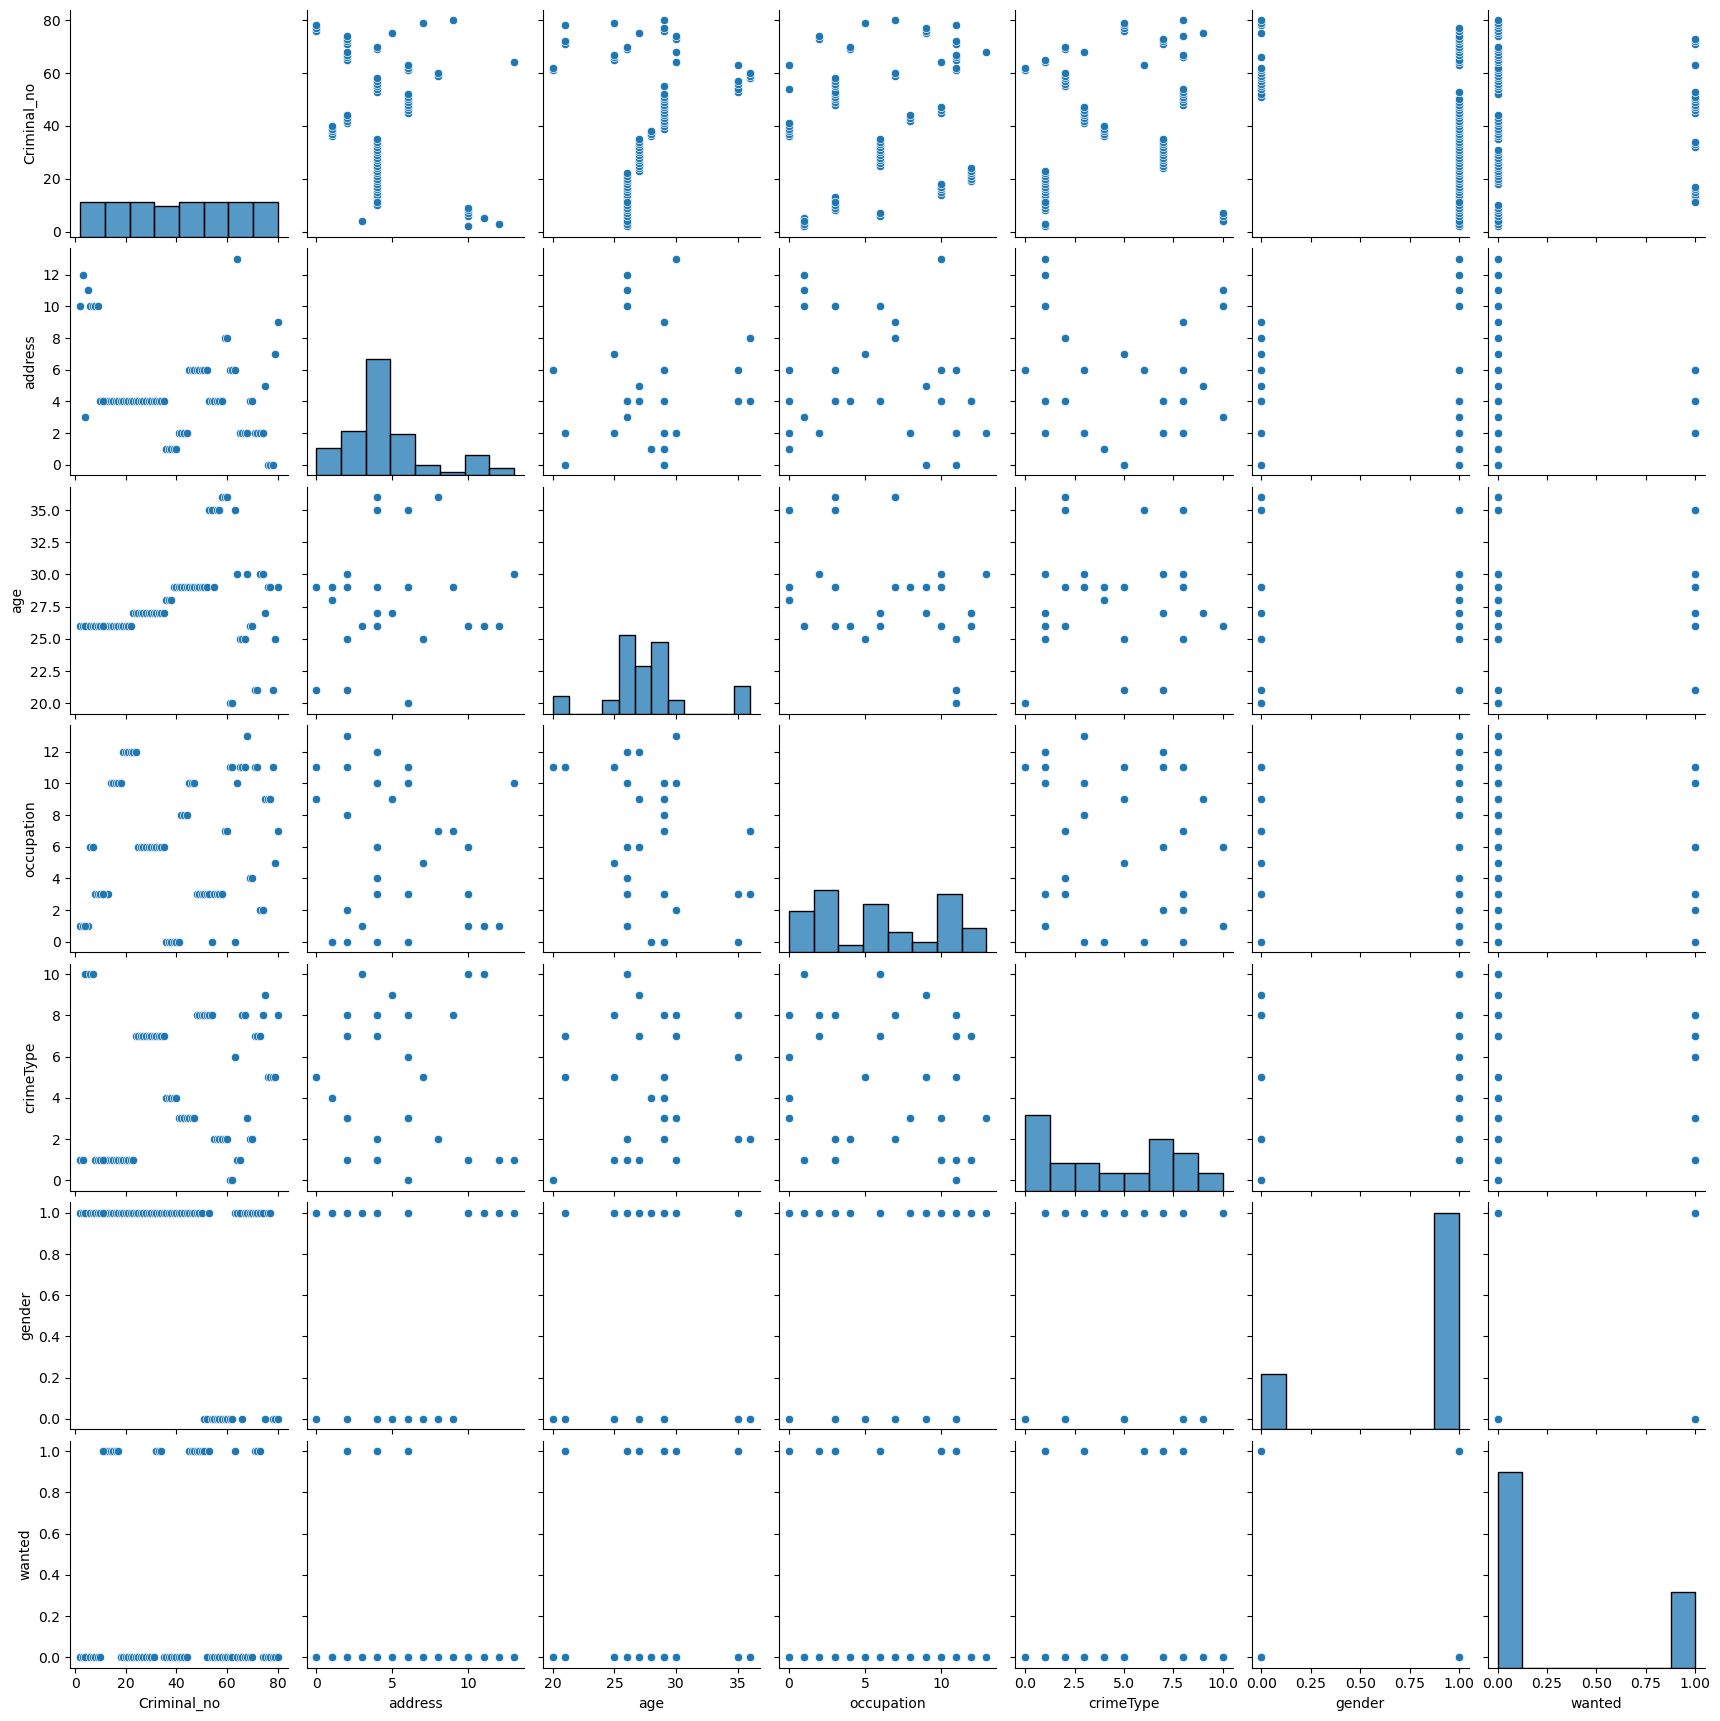

In [70]:
sns.pairplot(df)
plt.show()